In [15]:
# Systems and paths
import sys
import os

In [16]:
data_path = "/import/tintagel3/snert/louis/photometry/PCA/data"
sys.path.append(data_path)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import numpy as np

from tqdm.notebook import tqdm

#### values = "475_625_5"

In [19]:
names = os.listdir("{}/{}".format(data_path, values))

In [24]:
# %%time
nulls = [0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14]
data, PSF_data, PSF_names = [], [], []
names_in, grad_data, grad_names = [], [], []

# data = np.empty([5*len(names)//15, 4096, 4096])
idx = 0
for i in tqdm(range(len(names))):
    if "PSF" in names[i]:
        names_in.append(names[i])
        PSF_names.append(names[i])
#         data[idx] = np.load("{}/PCA_data/{}/{}".format(data_path, values, names[i]))
        file = np.load("{}/{}/{}".format(data_path, values, names[i]))
        data.append(file)
#         PSF_data.append(file)
        
    elif int(names[i][4]) not in nulls:
        names_in.append(names[i])
        grad_names.append(names[i])
#         data[idx] = np.load("{}/PCA_data/{}/{}".format(data_path, values, names[i]))
        print("{}/{}/{}".format(data_path, values, names[i]))
        file = np.load("{}/{}/{}".format(data_path, values, names[i]))
        
        data.append(file)
#         grad_data.append(file)
    idx += 1

/import/tintagel3/snert/louis/photometry/PCA/data/475_625_5/err_80_3.p



ValueError: Cannot load file containing pickled data when allow_pickle=False

In [7]:
# %%time
# data = np.load("{}/PCA/475_500_5.npy".format(data_path))

In [8]:
# for i in range(len(data)):
# #     v = np.max(np.abs(data))
#     data[i] = data[i]/np.sum(data[i])

In [9]:
# %%time
# data = np.array(data)

In [10]:
# for i in range(len(grad_data)):
# #     v = np.max(np.abs(data))
#     grad_data[i] = grad_data[i]/np.sum(np.abs(grad_data[i]))

In [11]:
%%time
data = np.array(data)*1e7
# grad_data = np.array(grad_data)*1e7
# PSF_data = np.array(PSF_data)*1e7

CPU times: user 8.45 s, sys: 8.58 s, total: 17 s
Wall time: 17 s


In [12]:
# print(len(PSF_data))
# print(len(grad_data))

In [13]:
c = data[0].shape[0]//2
s = 300

In [14]:
# ncols = 6
# nrows = 3
# plt.figure(figsize = (ncols*5,nrows*4))

# vmin = np.min(PSF_data)
# vmax = np.max(PSF_data)

# for i in range(nrows*ncols):
#     plt.subplot(nrows, ncols, i + 1)
#     plt.imshow(PSF_data[i][c-s:c+s, c-s:c+s], cmap=cm.seismic)
#     plt.title(PSF_names[i])
#     plt.xticks([])
#     plt.yticks([])
#     plt.colorbar()

# plt.tight_layout()
# plt.show()

In [15]:
# ncols = 6
# nrows = 8
# plt.figure(figsize = (ncols*5,nrows*4))

# vmin = np.min(grad_data)
# vmax = np.max(grad_data)

# for i in range(nrows*ncols):
#     plt.subplot(nrows, ncols, i + 1)
#     plt.imshow(grad_data[i][c-s:c+s, c-s:c+s], vmin=vmin, vmax=vmax, cmap=cm.seismic)
# #     plt.imshow(grad_data[i][c-s:c+s, c-s:c+s], cmap=cm.seismic)
#     plt.title(names[i])
#     plt.xticks([])
#     plt.yticks([])
#     plt.colorbar()

# plt.tight_layout()
# plt.show()

In [16]:
# %%time
# data_in = np.concatenate([PSF_data, grad_data]).reshape([data.shape[0], data.shape[1]**2])
# print(data.shape)

In [17]:
%%time
data_in = data.reshape([data.shape[0], data.shape[1]**2])
# data_in = PSF_data.reshape([PSF_data.shape[0], PSF_data.shape[1]**2])

CPU times: user 7 µs, sys: 14 µs, total: 21 µs
Wall time: 22.9 µs


In [18]:
print(data_in.shape)
print(data.shape)

(239, 16777216)
(239, 4096, 4096)


In [19]:
# img = data_in[0].reshape(PSF_data.shape[1], PSF_data.shape[1])
# c = PSF_data.shape[1]//2
# s = 250
# plt.imshow(img[c-s:c+s, c-s:c+s])

In [20]:
%%time
pca = PCA().fit(data_in)

CPU times: user 57min 20s, sys: 14min 38s, total: 1h 11min 59s
Wall time: 9min 34s


In [21]:
%%time
var = pca.explained_variance_ratio_
cumsum = np.cumsum(var)

CPU times: user 99 µs, sys: 26 µs, total: 125 µs
Wall time: 2.45 ms


In [22]:
print("Orignal Basis size: {}".format(len(cumsum)))

for i in range(8):
    val = 10**-(i+1)
    num = len(var) - len(cumsum[cumsum > 1-val])
    if num+1 < 10:
        print("Need  {} components for >{:.6f}% accuracy".format(num+1, 100*(1-val)))
    else:
        print("Need {} components for >{:.6f}% accuracy".format(num+1, 100*(1-val)))

Orignal Basis size: 239
Need  1 components for >90.000000% accuracy
Need  2 components for >99.000000% accuracy
Need  4 components for >99.900000% accuracy
Need 13 components for >99.990000% accuracy
Need 15 components for >99.999000% accuracy
Need 15 components for >99.999900% accuracy
Need 15 components for >99.999990% accuracy
Need 240 components for >99.999999% accuracy


In [23]:
num=15

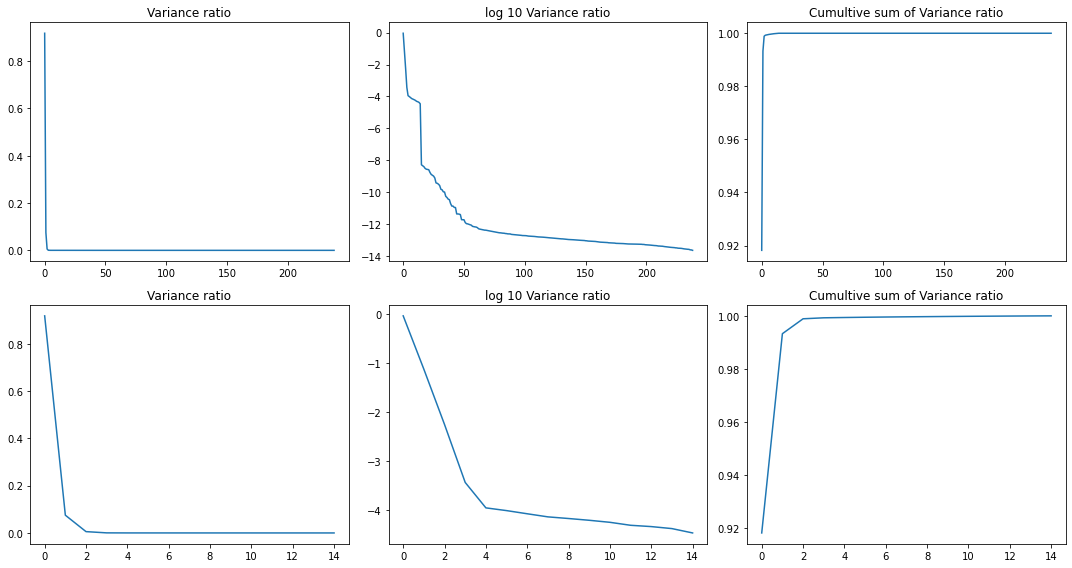

In [24]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.plot(var)
plt.title("Variance ratio")

plt.subplot(2, 3, 2)
plt.plot(np.log10(var))
plt.title("log 10 Variance ratio")

plt.subplot(2, 3, 3)
plt.plot(cumsum)
plt.title("Cumultive sum of Variance ratio")

plt.subplot(2, 3, 4)
plt.plot(var[:num])
plt.title("Variance ratio")

plt.subplot(2, 3, 5)
plt.plot(np.log10(var[:num]))
plt.title("log 10 Variance ratio")

plt.subplot(2, 3, 6)
plt.plot(cumsum[:num])
plt.title("Cumultive sum of Variance ratio")

plt.tight_layout()
plt.savefig("PCA_results")
plt.show()

In [25]:
%%time
pca = PCA(n_components=num).fit(data_in)

CPU times: user 11min 37s, sys: 1min 33s, total: 13min 11s
Wall time: 4min 43s


In [26]:
val = data[0].shape[0]
basis = pca.components_.reshape([len(pca.components_), val, val])
mean = pca.mean_.reshape([val, val])

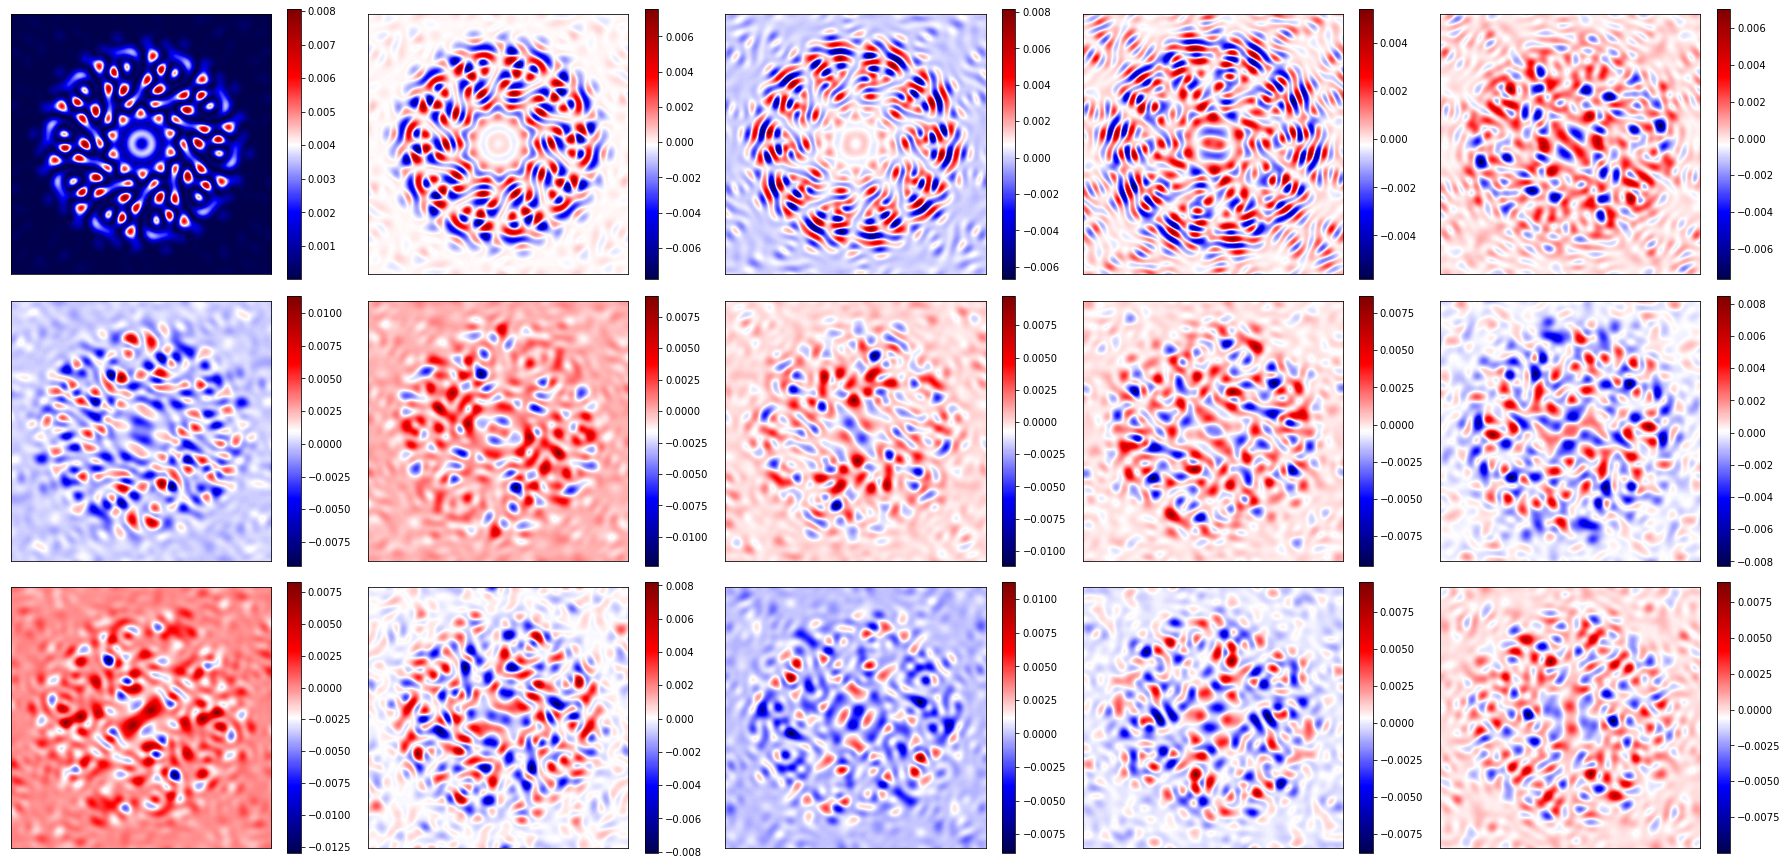

In [27]:
ncols = 5
nrows = 6

plt.figure(figsize = (ncols*5,nrows*4))
for i in range(len(basis)):
    plt.subplot(nrows, ncols, i + 1)
#     plt.imshow((mean + basis[i])[c-s:c+s, c-s:c+s], cmap=cm.seismic)
    plt.imshow(basis[i][c-s:c+s, c-s:c+s], cmap=cm.seismic)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
plt.tight_layout()
plt.savefig("PSF_basis")
plt.show()

In [28]:
np.save("Basis_{}.npy".format(values), pca.components_)
np.save("mean_{}.npy".format(values), pca.mean_)
np.save("{}/PCA_data/Basis_{}.npy".format(data_path, values), pca.components_)
np.save("{}/PCA_data/mean_{}.npy".format(data_path, values), pca.mean_)

# np.save("Basis_475_500_5_odds.npy", pca.components_)
# np.save("mean_475_500_5_odds.npy", pca.mean_)
# np.save("{}/PCA/Basis_475_500_5_odds.npy".format(data_path), pca.components_)
# np.save("{}/PCA/mean_475_500_5_odds.npy".format(data_path), pca.mean_)

In [29]:
values

'475_625_5'

## Done
---
---
---

In [74]:
%%time
T = pca.transform(data_in)

CPU times: user 2.28 s, sys: 156 ms, total: 2.43 s
Wall time: 594 ms


In [75]:
reconstructed = np.dot(T, pca.components_).reshape(PSF_data.shape)
print(len(reconstructed)//6)
print((len(reconstructed)//ncols) + 1)

2
3


In [76]:
reconstructed = pca.inverse_transform(T).reshape(PSF_data.shape)

In [77]:
reconstructed.shape

(12, 4096, 4096)

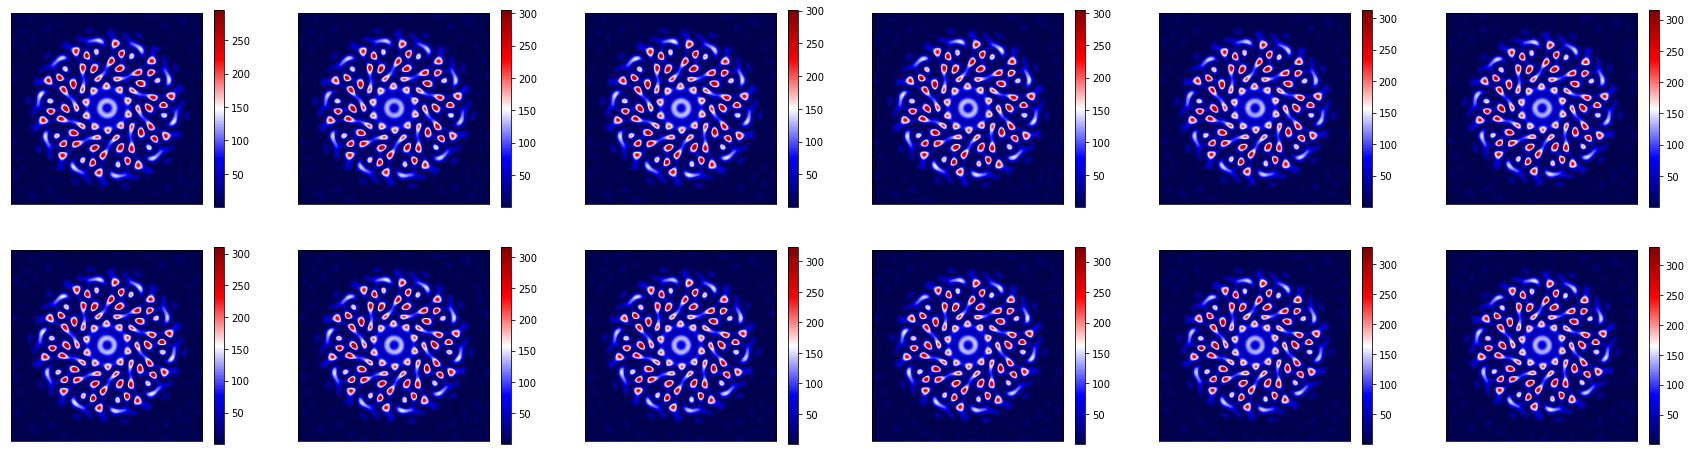

In [78]:
ncols = 6
nrows = 2

plt.figure(figsize = (ncols*5,nrows*4))

vmin = np.min(reconstructed)
vmax = np.max(reconstructed)*1e-3
v = np.max([np.abs(vmin), vmax])

# for i in range(len(reconstructed)):
for i in range(ncols*nrows):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(PSF_data[i][c-s:c+s, c-s:c+s], cmap=cm.seismic)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
plt.show()

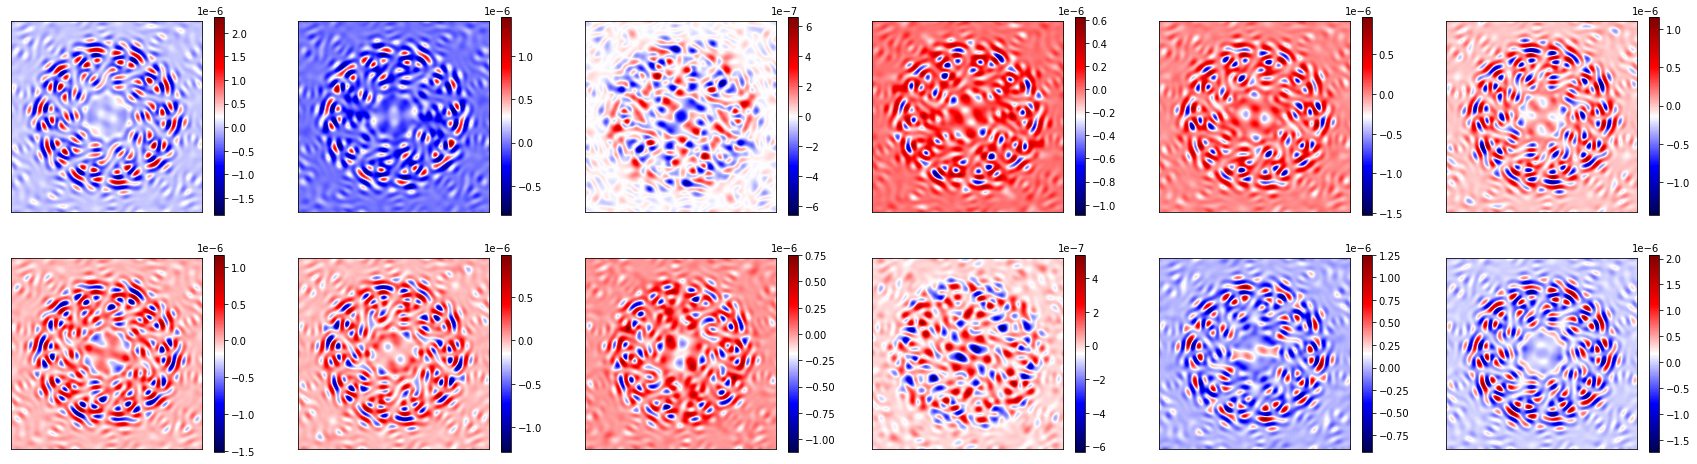

In [79]:
ncols = 6
nrows = 2

plt.figure(figsize = (ncols*5,nrows*4))

vmin = np.min(reconstructed)
vmax = np.max(reconstructed)*1e-3
v = np.max([np.abs(vmin), vmax])

# for i in range(len(reconstructed)):
for i in range(ncols*nrows):
    plt.subplot(nrows, ncols, i + 1)
    rnorm = reconstructed[i]/np.sum(reconstructed[i])
    dnorm = PSF_data[i]/np.sum(PSF_data[i])
    
    
#     plt.imshow(reconstructed[i][c-s:c+s, c-s:c+s], vmin=-v, vmax=v, cmap=cm.seismic)
#     plt.imshow((reconstructed[i] - np.min(reconstructed[i]))[c-s:c+s, c-s:c+s], cmap=cm.seismic)
#     plt.imshow(PSF_data[i][c-s:c+s, c-s:c+s], cmap=cm.seismic)
    plt.imshow((rnorm-dnorm)[c-s:c+s, c-s:c+s], cmap=cm.seismic)
#     plt.imshow(data[i] - reconstructed[i], vmin=vmin, vmax=vmax, cmap=cm.seismic)
#     plt.imshow(data[i] - reconstructed[i], cmap=cm.seismic)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
plt.show()

## Ali section

In [204]:
pca = PCA(n_components=5).fit(data_in)

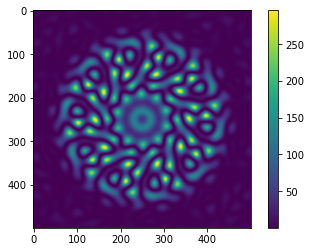

In [205]:
data_point = PSF_data[0]
plt.imshow(data_point[c-s:c+s, c-s:c+s])
plt.colorbar()

In [206]:
T = pca.transform(data_point.flatten().reshape(1, -1))

In [207]:
# img = T[:,0][0] * pca.components_[0, :]
# for i in range(1, 12):
#     img += T[:,0] * pca.components_[0, :]
# img += pca.mean_

In [208]:
# final = img.reshape(data_point.shape) 
# plt.imshow(final[c-s:c+s, c-s:c+s])
# plt.colorbar()

In [209]:
print(T.shape)
print(pca.components_.shape)

(1, 5)
(5, 16777216)


In [202]:
print(T)

[[9038.717  2013.2236]]


In [181]:
img = (np.dot(T, pca.components_) + pca.mean_).reshape(data_point.shape) - data_point

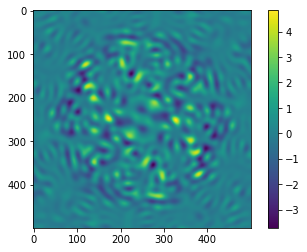

In [182]:
plt.imshow(img[c-s:c+s,c-s:c+s])
plt.colorbar()

In [147]:

T_new = T*np.random.rand(12)*0.5
reconstructed = pca.inverse_transform(T)
r = reconstructed.reshape(data_point.shape)

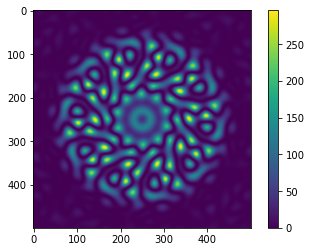

In [150]:
plt.imshow(r[c-s:c+s, c-s:c+s])
plt.colorbar()

In [121]:
data_in.mean(axis = 2)

IndexError: tuple index out of range

In [117]:
data_in.mean()

0.5960464

In [108]:
T[:,0][0]

9052.354

In [107]:
pca.components_[:, 0]

array([-1.1457668e-03,  3.2472326e-03, -3.1783325e-03,  3.1315917e-03,
       -1.7007366e-03,  3.1406740e-03, -4.0019522e-03, -2.4390458e-03,
        2.5877361e-03, -1.7975024e-03,  2.8927182e-04,  5.1690555e-01],
      dtype=float32)